# 2월 2주 1일차

### 공공데이터 포털 가입하기
- https://www.data.go.kr/

### 설계
 - 1. 데이터를 수집할 국가코드와 연도 입력   national_code, nStartYear, nEndYear
 - 2. 데이터 수집 요청              getTourismStatsService()
    - url 구성해서 데이터 요청 :    getTourismStatsItem()
    - url 접속하고 요청 :           getRequestUrl()
 - 3. 데이터를 JSON파일과 CSV 파일로 저장 : json.dumps().to_csv()    

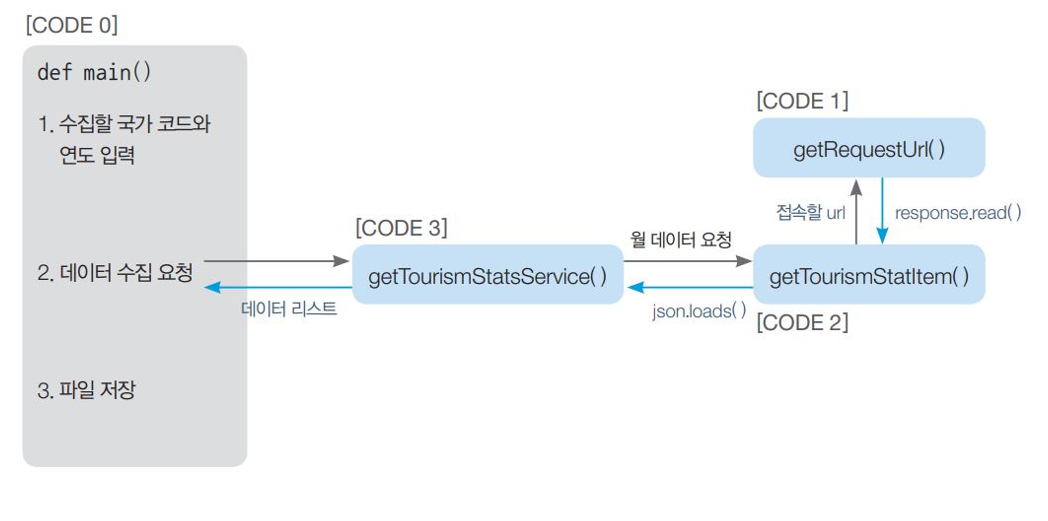

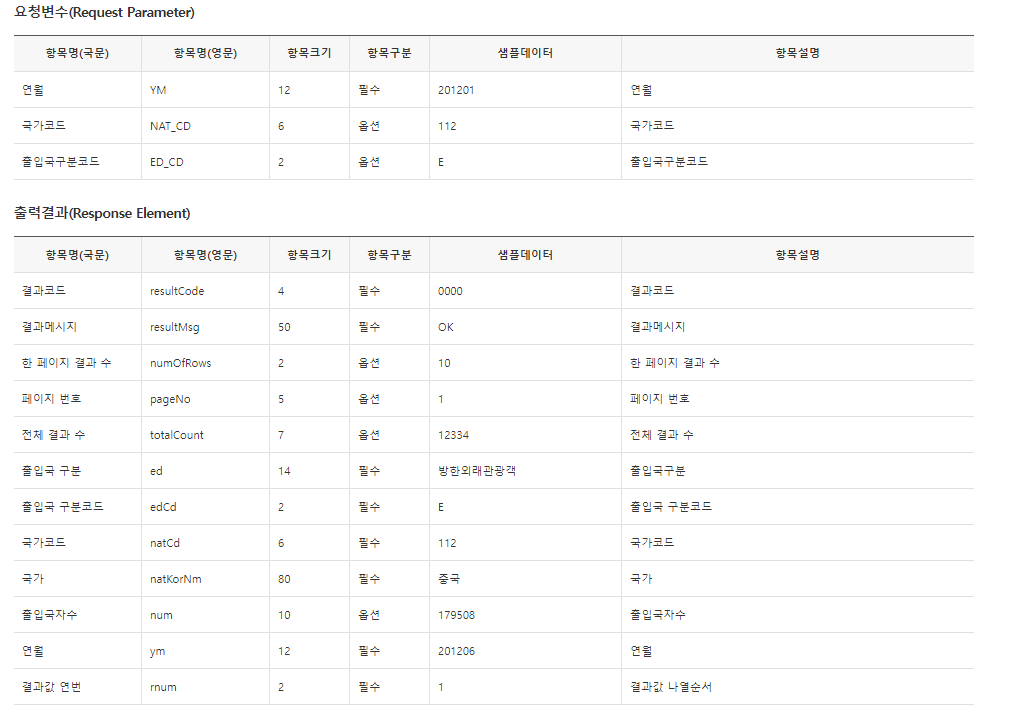

In [16]:
# Python3 샘플 코드 #


import requests

url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
service_key = 'U5i63xpIWM48raIRQBYpUXbA/wKd0iO6n/n1+JISyoEW1gWcEiz2No2fHPeid5TZoQN0HV85WyGv6LPwaQ8n4w=='
params ={'serviceKey' : service_key, 'YM' : '202403', 'NAT_CD' : '112', 'ED_CD' : 'E' }

response = requests.get(url, params=params)
print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>0000</resultCode><resultMsg>OK</resultMsg></header><body><items><item><ed>\xeb\xb0\xa9\xed\x95\x9c\xec\x99\xb8\xeb\x9e\x98\xea\xb4\x80\xea\xb4\x91\xea\xb0\x9d</ed><edCd>E</edCd><natCd>112</natCd><natKorNm>\xec\xa4\x91  \xea\xb5\xad</natKorNm><num>391347</num><rnum>1</rnum><ym>202403</ym></item></items><numOfRows>10</numOfRows><pageNo>1</pageNo><totalCount>1</totalCount></body></response>'


In [17]:
import xml.dom.minidom
dom = xml.dom.minidom.parseString(response.content)
xml_as_string = dom.toprettyxml()
print(xml_as_string)

<?xml version="1.0" ?>
<response>
	<header>
		<resultCode>0000</resultCode>
		<resultMsg>OK</resultMsg>
	</header>
	<body>
		<items>
			<item>
				<ed>방한외래관광객</ed>
				<edCd>E</edCd>
				<natCd>112</natCd>
				<natKorNm>중  국</natKorNm>
				<num>391347</num>
				<rnum>1</rnum>
				<ym>202403</ym>
			</item>
		</items>
		<numOfRows>10</numOfRows>
		<pageNo>1</pageNo>
		<totalCount>1</totalCount>
	</body>
</response>



### 함수 설계하기

In [ ]:
import json
import requests
import pandas as pd
# code0
def main():
  jsonResult = []
  result = []
  print("<< 국내 입국한 외국인의 통계 데이터를 수집합니다.")
  nat_cd = input('국가 코드를 입력하세요(중국:112, 일본:130, 미국:275)')
  nStartYear = int(input('데이터를 몇 년부터 수집할까요?'))
  nEndYear = int(input('데이터를 몇 년까지 수집할까요?'))
  ed_cd = "E"  # E 방한외국인 , D:해외 출국

  # API를 호출해서 원하는 데이터를 수집
  jsonResult,result,natName,dateEnd =  getTourismStatsService(nat_cd, ed_cd, nStartYear, nEndYear) # code3

  # 수집한 데이터를 json파일로 저장
  with open(f'{natName}_{ed_cd}_{nStartYear}_{ed_cd}.json', 'w', encoding='utf8') as outfile:
    jsonFile = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
    outfile.write(jsonFile)

  # 수집한 데이터를 csv파일로 저장
  df = pd.DataFrame(result,columns=['입국자국가','국가코드','입국연월','입국자 수'])
  df.to_csv(f'{natName}_{ed_cd}_{nStartYear}_{ed_cd}.csv', index=False, encoding='cp949')



In [18]:
# with open('test.txt', 'w', encoding='utf8') as outfile:
#   outfile.write('test')

In [ ]:
# code1
import urllib.request
def getRequestUrl(url):
  req = urllib.request.Request(url)
  try:
    response = urllib.request.urlopen(req)
    if response.getcode() == 200:
      print(f'[{response.getcode()}]')
      return response.read().decode('utf-8')
  except Exception as e:
    print(e)


In [22]:
import json
# code2
def getTourismStatsItem(yyyymm, national_code, ed_cd):
  url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
  service_key = 'U5i63xpIWM48raIRQBYpUXbA/wKd0iO6n/n1+JISyoEW1gWcEiz2No2fHPeid5TZoQN0HV85WyGv6LPwaQ8n4w=='
  params ="?_type=json&serviceKey=" + service_key + "&YM=" + yyyymm + "&NAT_CD=" + national_code + "&ED_CD=" + ed_cd
  url += params
  responseDecode =  getRequestUrl(url)  # code1
  if (responseDecode == None):
    return None
  else:
    return json.loads(responseDecode)